In [52]:
import pandas as pd
data=pd.read_csv('gender_submission.csv')
train=pd.read_csv('train_titanic.csv')
test=pd.read_csv('test_titanic.csv')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train.shape

(891, 12)

In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
test.shape

(418, 11)

In [57]:
train=train.dropna(how='all')
train=train.fillna(0)
test=test.dropna(how='all')
test=test.fillna(0)
train.shape, test.shape

((891, 12), (418, 11))

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [59]:
train.drop_duplicates(inplace=True)
train.shape

(891, 12)

In [60]:
test.drop_duplicates(inplace=True)
test.shape

(418, 11)

In [61]:
print("Number of survivors : ",(train['Survived']==1).sum())
print("Number of people on the boat : ",train['Survived'].count())
print("Number of deaths : ",train['Survived'].count()-(train['Survived']==1).sum())

Number of survivors :  342
Number of people on the boat :  891
Number of deaths :  549


In [62]:
number_people_class1 = train["Pclass"].value_counts()[1]
print("Number people in class 1 : ",number_people_class1)
number_people_class2 = train["Pclass"].value_counts()[2]
print("Number people in class 2 : ",number_people_class2)
number_people_class3 = train["Pclass"].value_counts()[3]
print("Number people in class 3 : ",number_people_class3)

Number people in class 1 :  216
Number people in class 2 :  184
Number people in class 3 :  491


In [63]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

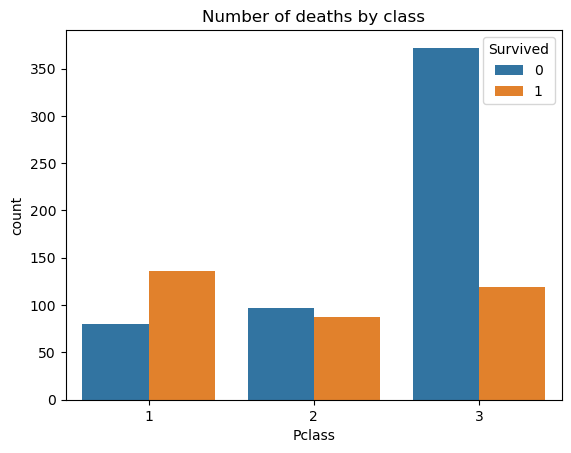

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Number of deaths by class")
plt.show()

Text(0.5, 1.0, 'Number of survived by class and fare')

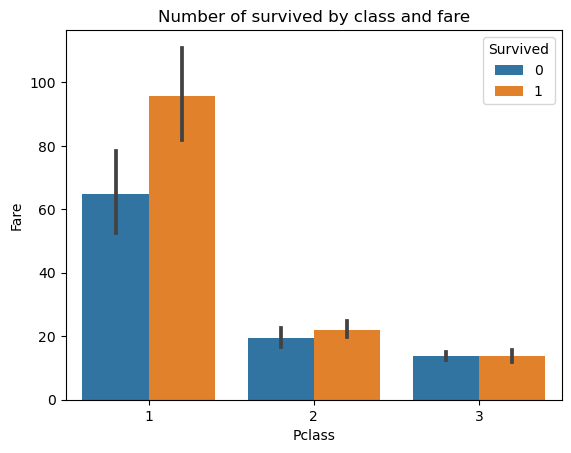

In [65]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.title("Number of survived by class and fare")

In [66]:
number_women=train["Sex"].value_counts()["female"]
print("Number of women : ",number_women)

Number of women :  314


In [67]:
number_men=train["Sex"].value_counts()["male"]
print("Number of men : ",number_men)

Number of men :  577


In [68]:
print(train[train['Sex']=='female']['Pclass'].value_counts())#nombre de femme par classes

3    144
1     94
2     76
Name: Pclass, dtype: int64


In [69]:
pourcent_women_class1= train.loc[(train["Sex"] == "female") & (train["Pclass"] == 1)].count()["Sex"]/number_people_class1*100
print("Percentage of women in class 1 : ",pourcent_women_class1)

Percentage of women in class 1 :  43.51851851851852


In [70]:
pourcent_men_class1= train.loc[(train["Sex"] == "male") & (train["Pclass"] == 1)].count()["Sex"]/number_people_class1*100
print("Percentage of men in class 1 : ",pourcent_men_class1)

Percentage of men in class 1 :  56.481481481481474


In [71]:
partition_women_class1= train.loc[(train["Sex"] == "female") & (train["Pclass"] == 1)].count()["Sex"]/number_women*100
print("On the boat,",partition_women_class1, "of women are in class 1")

On the boat, 29.936305732484076 of women are in class 1


In [72]:
partition_men_class1= train.loc[(train["Sex"] == "male") & (train["Pclass"] == 1)].count()["Sex"]/number_men*100
print("On the boat,",partition_men_class1, "of men are in class 1")

On the boat, 21.143847487001732 of men are in class 1


In [73]:
women_survived = train.loc[train.Sex == 'female']["Survived"]#on affiche la colonne survived pour les femmes
percent_women_survivors = sum(women_survived)/len(women_survived)*100
print("Number of women who survived : ", sum(women_survived))
print("Percentage of women who survived:", percent_women_survivors)

men_survived = train.loc[train.Sex == 'male']["Survived"]#on affiche la colonne survived pour les femmes
percent_men_survivors = sum(men_survived)/len(men_survived)*100 #women_survived=1 quand la femme a survecu c'est pourquoi sum(women_survived) compte le nombre de survivantes
print("Percentage of men who survived:", percent_men_survivors)
print("Number of men who survived : ", sum(men_survived))


Number of women who survived :  233
Percentage of women who survived: 74.20382165605095
Percentage of men who survived: 18.890814558058924
Number of men who survived :  109


In [74]:
under_18 = train.loc[train["Age"] < 18].count()["Age"]
print("Number of children : ",under_18)

Number of children :  290


In [75]:
survivors_under_18 = train.loc[(train["Age"] <18 ) & (train["Survived"] == 1)].count()["Age"]
percent_survivors_under_18 = survivors_under_18/under_18*100
print("Number of children who died : ",under_18-survivors_under_18)
print("Percent of children who died : ",100-percent_survivors_under_18)

Number of children who died :  177
Percent of children who died :  61.03448275862069


In [76]:
under_18_class3 = train.loc[(train["Age"] <18 ) & (train["Pclass"] == 3)].count()["Age"]
print("Number of children in class 3 : ", under_18_class3)
under_18_class2 = train.loc[(train["Age"] <18 ) & (train["Pclass"] == 2)].count()["Age"]
print("Number of children in class 2 : ",under_18_class2)
under_18_class1 = train.loc[(train["Age"] <18 ) & (train["Pclass"] == 1)].count()["Age"]
print("Number of children in class 1 : ",under_18_class1)

Number of children in class 3 :  214
Number of children in class 2 :  34
Number of children in class 1 :  42


In [77]:
survivors_children_class3 = train.loc[(train["Age"] <18 ) & (train["Pclass"] == 3) & (train["Survived"]==1)].count()["Age"]
percent_survivors_children_class3 = survivors_children_class3/under_18_class3*100
print("Number of chilren in class 3 who survived : ", survivors_children_class3)
print("Percent of chilren in class 3 who survived : ", percent_survivors_children_class3)

Number of chilren in class 3 who survived :  63
Percent of chilren in class 3 who survived :  29.439252336448597


In [78]:
survivors_children_class1 = train.loc[(train["Age"] <18 ) & (train["Pclass"] == 1) & (train["Survived"]==1)].count()["Age"]
percent_survivors_children_class1 = survivors_children_class1/under_18_class1*100
print("Number of chilren in class 3 who survived : ", survivors_children_class1)
print("Percent of chilren in class 3 who survived : ", percent_survivors_children_class1)

Number of chilren in class 3 who survived :  25
Percent of chilren in class 3 who survived :  59.523809523809526


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

display(train.groupby(['Pclass','Sex',])['Age','Fare'].mean())

/var/folders/4f/h8pcg8594_39w3f803d9r5_w0000gn/T/ipykernel_68997/1088971592.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(train.groupby(['Pclass','Sex',])['Age','Fare'].mean())


Age        Fare
Pclass Sex                          
1      female  31.297872  106.125798
       male    34.175574   67.226127
2      female  27.967105   21.970121
       male    28.178981   19.741782
3      female  15.406250   16.118810
       male    19.326859   12.661633

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
display(train.groupby('Pclass')['Age'].median())

Pclass
1    35.0
2    28.0
3    20.0
Name: Age, dtype: float64

In [81]:
train.groupby('Survived')['Age'].mean()

Survived
0    23.653005
1    24.034123
Name: Age, dtype: float64

In [82]:
train.groupby("Survived")["Age"].median()

Survived
0    24.0
1    25.0
Name: Age, dtype: float64

In [83]:
display(train.groupby('Embarked')['Survived'].mean())

Embarked
0    1.000000
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [84]:
embarkedC = train["Embarked"].value_counts()['C']
print("Number of people who enter by embarked C: ", embarkedC)
class2_embarkedC = train.loc[(train["Embarked"] == 'C') & (train["Pclass"] == 2)].count()["Embarked"]
print("Number of people who are in class 2 and who enter by embarked C : ",class2_embarkedC,"/",number_people_class2)
class3_embarkedC = train.loc[(train["Embarked"] == 'C') & (train["Pclass"] == 3)].count()["Embarked"]
print("Number of people who are in class 3 and who enter by embarked C : ",class3_embarkedC,"/",number_people_class3)
class1_embarkedC = train.loc[(train["Embarked"] == 'C') & (train["Pclass"] == 1)].count()["Embarked"]
print("Number of people who are in class 1 and who enter by embarked C : ",class1_embarkedC,"/",number_people_class1)

Number of people who enter by embarked C:  168
Number of people who are in class 2 and who enter by embarked C :  17 / 184
Number of people who are in class 3 and who enter by embarked C :  66 / 491
Number of people who are in class 1 and who enter by embarked C :  85 / 216


In [85]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='SibSp', ascending=True)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


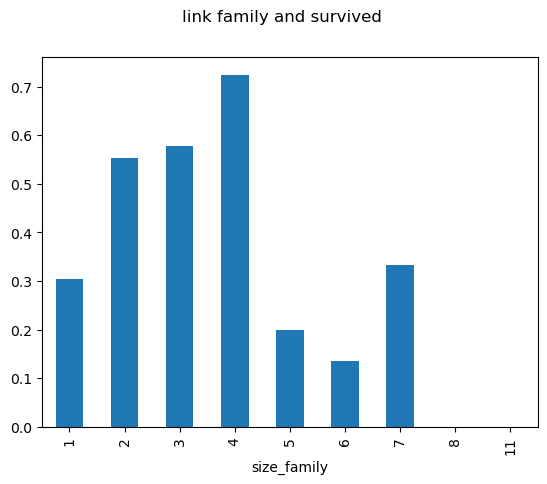

In [86]:
import matplotlib.pyplot as plt
train['size_family']=train['SibSp']+train['Parch']+1

plt.figure()
train[['size_family','Survived']].groupby('size_family')['Survived'].mean().plot(kind='bar')
plt.suptitle('link family and survived')

plt.show()

In [87]:
train.Sex.unique()
train['Sex'] = train['Sex'].map({'male' : 0,
           'female' : 1})
test.Sex.unique()
test['Sex'] = test['Sex'].map({'male' : 0,
           'female' : 1})

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train.drop(["Name","Survived","Ticket","Cabin","Embarked", "PassengerId", "size_family"], axis=1)
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

def Survived(model, Pclass, Sex, Age, SibSp, Parch, Fare):
    x = np.array([Pclass,Sex, Age, SibSp, Parch, Fare]).reshape(1, -1)
    prediction = model.predict(x)
    probability = model.predict_proba(x)
    print("Prediction:", prediction)
    print("Probabilities:", probability)

Survived(model, 1,1,38,4,2,200)   

Accuracy: 0.7821229050279329
Prediction: [1]
Probabilities: [[0.17775531 0.82224469]]


/Users/anoukleyris/miniconda3/envs/py38_1/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/anoukleyris/miniconda3/envs/py38_1/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [88]:
X_test = test.drop(["PassengerId", "Name", "Ticket", "Cabin","Embarked"], axis=1)
y_true = data["Survived"]

predictions = model.predict(X_test)

accuracy = accuracy_score(y_true, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.9832535885167464


In [89]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]   

X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
